# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [7]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [8]:
x_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
y_1 = [10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26.])

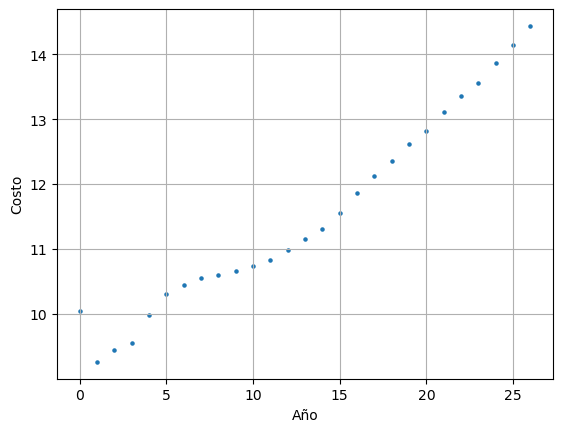

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,26,27)
y = y_1

plt.figure()
plt.scatter(x,y, s=5)
plt.grid()
plt.xlabel('Año')
plt.ylabel('Costo')
x

Text(0, 0.5, 'COSTO')

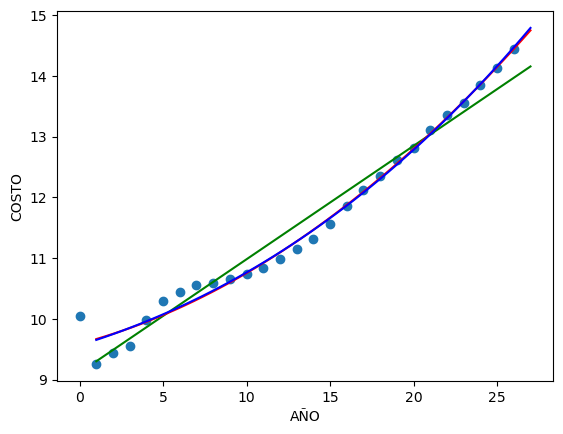

In [70]:
df = pd.DataFrame(list(zip(x_1, y_1)),
               columns =['x', 'y'])
df

x1 = np.poly1d(np.polyfit(df.x, df.y, 1))
x2 = np.poly1d(np.polyfit(df.x, df.y, 2))
x3 = np.poly1d(np.polyfit(df.x, df.y, 3))

polyline = np.linspace(1, 27, 50)
plt.scatter(df.x, df.y)

plt.plot(polyline, x1(polyline), color="g")
plt.plot(polyline, x2(polyline), color="r")
plt.plot(polyline, x3(polyline), color="b")
plt.xlabel("AÑO")
plt.ylabel("COSTO")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [12]:
import pandas as pd
data = pd.read_csv("population_data.csv")
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [20]:
x = data["Year"].values
x2 = data["Poblacion"].values 
x3 = data["Nacimientos"].values 
x4 = data["Decesos"].values 

x

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [44]:
x = data["Year"].values - 1957
y = data["Poblacion"].values

m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])
x4 = np.reshape(x**4, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))
X4 = np.hstack((ones, x1, x2, x3, x4))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)
beta_inicial4 = np.random.rand(5)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]


In [45]:
import scipy.optimize as opt
import numpy as np
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))
sol4 = opt.minimize(foo, beta_inicial4, args=(X4, y_vector))

sol1

      fun: 212137169.54675013
 hess_inv: array([[ 2.16977229e-02, -5.53560112e-04],
       [-5.53560112e-04,  2.16025091e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 57
      nit: 8
     njev: 19
   status: 0
  success: True
        x: array([34945.81945168,  1543.97365571])

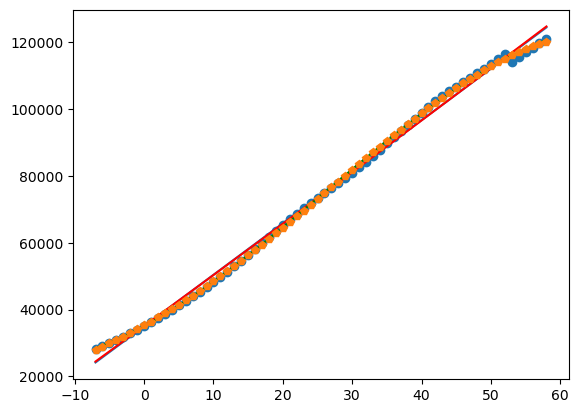

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X2 @ sol2.x, "r")
plt.plot(x, X3 @ sol3.x, "g")
plt.plot(x, X4 @ sol4.x, "p")

<BarContainer object of 4 artists>

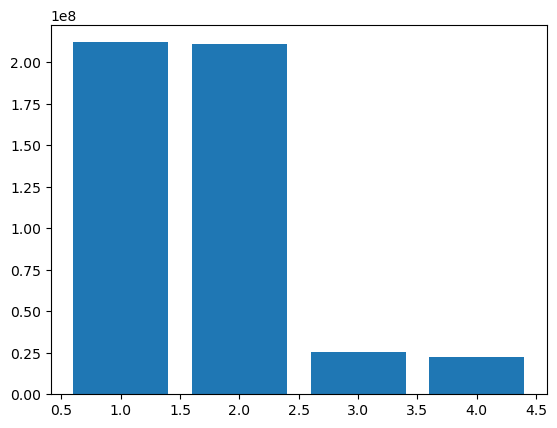

In [47]:
plt.figure()
plt.bar([1, 2, 3, 4], [sol1.fun, sol2.fun, sol3.fun, sol4.fun])

In [48]:
sol3

      fun: 25240442.632153835
 hess_inv: array([[ 5.55043340e-02, -2.11251197e-02,  1.02488996e-03,
        -1.22828802e-05],
       [-2.11251197e-02,  1.27988478e-02, -6.38013579e-04,
         7.67296344e-06],
       [ 1.02488996e-03, -6.38013579e-04,  3.19229668e-05,
        -3.84607806e-07],
       [-1.22828802e-05,  7.67296344e-06, -3.84607806e-07,
         4.64033519e-09]])
      jac: array([ 0.  , -0.25, -4.75,  0.  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 215
      nit: 9
     njev: 42
   status: 2
  success: False
        x: array([ 3.50429300e+04,  1.12153115e+03,  2.40709282e+01, -3.09230785e-01])

In [50]:
def f(x) :
    return 3.50429300e+04 + 1.12153115e+03*x + 2.40709282e+01*x**2 + -3.09229633e-01*x**3

f(2019 - 1988)

83730.297653497